In [12]:
file_path = r"C:\unibo-dtm-ml-2526-cervical-cancer-predictor\data\raw.csv"
with open(file_path, 'r') as f:
    lines = f.readlines()
print('Read {} lines'.format(len(lines)))

Read 859 lines


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv(file_path)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### Dataset Description

1. **`Age`**: Patient's age in years.
2. **`Number of sexual partners`**: Lifetime total of sexual partners.
3. **`First sexual intercourse`**: Age (years) at first sexual encounter.
4. **`Num of pregnancies`**: Total number of pregnancies.
5. **`Smokes`**: Binary indicator (1=Yes, 0=No) if the patient currently smokes.
6. **`Smokes (years)`**: Total duration of smoking habit in years.
7. **`Smokes (packs/year)`**: Average number of cigarette packs consumed per year.
8. **`Hormonal Contraceptives`**: Binary indicator (1=Yes, 0=No) for hormonal birth control use.
9. **`Hormonal Contraceptives (years)`**: Total duration of hormonal contraceptive use in years.
10. **`IUD`**: Binary indicator (1=Yes, 0=No) for the presence of an Intrauterine Device.
11. **`IUD (years)`**: Total duration of IUD use in years.
12. **`STDs`**: Binary indicator (1=Yes, 0=No) for any history of sexually transmitted diseases.
13. **`STDs (number)`**: Total count of different types of STDs contracted by the patient.
14. **`STDs:condylomatosis`**: Binary indicator for history of genital warts.
15. **`STDs:cervical condylomatosis`**: Binary indicator for warts specifically on the cervix.
16. **`STDs:vaginal condylomatosis`**: Binary indicator for warts specifically in the vagina.
17. **`STDs:vulvo-perineal condylomatosis`**: Binary indicator for warts on external genitalia.
18. **`STDs:syphilis`**: Binary indicator for history of Syphilis infection.
19. **`STDs:pelvic inflammatory disease`**: Binary indicator for history of PID.
20. **`STDs:genital herpes`**: Binary indicator for history of Herpes infection.
21. **`STDs:molluscum contagiosum`**: Binary indicator for history of Molluscum contagiosum.
22. **`STDs:AIDS`**: Binary indicator for history of AIDS (typically 0 in this dataset).
23. **`STDs:HIV`**: Binary indicator for history of HIV infection.
24. **`STDs:Hepatitis B`**: Binary indicator for history of Hepatitis B.
25. **`STDs:HPV`**: Binary indicator for history of Human Papillomavirus.
26. **`STDs: Number of diagnosis`**: Total number of confirmed STD diagnoses.
27. **`STDs: Time since first diagnosis`**: Years elapsed since the patient's first STD diagnosis.
28. **`STDs: Time since last diagnosis`**: Years elapsed since the patient's most recent STD diagnosis.
29. **`Dx:Cancer`**: Clinical history indicating if the patient was previously diagnosed with cancer.
30. **`Dx:CIN`**: History of Cervical Intraepithelial Neoplasia (precancerous condition).
31. **`Dx:HPV`**: History of a clinical HPV diagnosis.
32. **`Dx`**: General indicator of any previous medical diagnosis.
33. **`Hinselmann`**: Target 1: Result of colposcopy (abnormal visual exam).
34. **`Schiller`**: Target 2: Result of Lugol's iodine staining test (staining abnormalities).
35. **`Citology`**: Target 3: Result of a Pap smear (cytological cell analysis).
36. **`Biopsy`**: Target 4: Result of tissue sample analysis (histological gold standard).



### Data Profiling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858,858,858,858,858,858,858,858,858,...,858,858,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,13,22,12,3,31,63,3,41,3,...,19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,272,163,270,722,722,722,481,269,658,...,787,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Downsides list 
As things stand, we are definetely not happy with what we've understood so far: 
- Missing values are not simply empty cells, but rather they're marked by a "?" sign implying that the value is unkown. This means that there are no missing entries (count=858 for all columns), yet those cells that would have been empty are filled with the aforementioned string value. 
- Columns containing such missing values are characterized by the "object" data type because they both store numerical (normally registered entries) and string information (the "?" marks indeed). 
- No mathematically-backed formulae can be performed on object values, as we see from the table above, thus meaning that no relevant distribution information can be inferred by columns affected by such values. 
- I presume that all the other columns with DType == int64 are complete, but this will be certified upon deeper inspection of the dataset. 



### Room for work
1. Deal with the missing values. First of all, I need to get rid of the "?" signs. Further preprocessing steps will be covered on those cells affected by the removal. 


In [8]:
# Reshaping the dataframe. This time the '?' values are considered as NaN values.
df = pd.read_csv(r'C:\unibo-dtm-ml-2526-cervical-cancer-predictor\data\raw.csv',na_values='?')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
df.infer_objects().dtypes



Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

### Actual Data Profiling
Now that I've changed the dtype of the "object" dtype of the various attributes, it is possible to carry out Data Profiling and expose the true nature of the dataset. By this I mean that, since in the earlier case all columns with missing data were characterized by "object" data type, there seemed to be no problem with missing entries: all values, including numerical (right) and "?" (missing) ones were recognized as existent. 
What I realistically expect after running the cell below is to get the real structure of the dataset, where all previous "?" entries are NaN values, hence excluded from the counting. Many missing values will likely pop up in all the previous dtype == object columns.  

In [10]:
print("\nDataset Info: \n")
print(df.info())
print("\nMissing Values: \n")
print(df.isnull().sum()) 
print("\nDuplicate Values: \n")
print(df.duplicated().sum())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                        

#### Takeaways from this showcase
There's some of them that deserve to be highlighted: 
- Missing values do exist, and there's a lot of them: only the "Age", "STDs: Number of diagnosis", and the last columns from "Dx: Cancer" are complete. All the other colums are characterized by missing values at different levels of severity. To make things clearer, we can divide these troublesome columns in three "zones": 
    - A "yellow" zone consisting of columns 1 (index from 0) to 6. These columns have less than 100 missing values. Some of them have very few of them. Inputation will likely be performed.  
    - A "red" zone consisting of columns 7 to 24. These columns have between 101 and 117 missing values. Inputation could be a possibility for this zone too. 
    - A "purple" zone consisting of columns 26 and 27. The amount of missing values affecting these two columns may want to see them from the opposite view: there's only 71 valid entries in both the two columns! Inputation is definetely not a thing in this case: these columns will likely be dropped. 
- A significant amount of duplicate values: 23 duplicates were spotted, composing nearly the 3% of the whole dataset. Their noticeable presence will surely affect future modelling performance, hence they will be likely dropped. 
- High class imbalance: diagnostic tests (the last 4 columns) are characterized by very low values for the mean, thus indicating that, as it was expected from a medical dataset, data greatly tend towards negativity to the tests. 

It is now time to perform some Visual Profiling, which definetely helps better inquadrate the issues just exposed. 


#### MISSING DATA VISUALIZATION

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.62x0.77)
Error in callback <function _draw_all_if_interactive at 0x00000215DD62BBE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

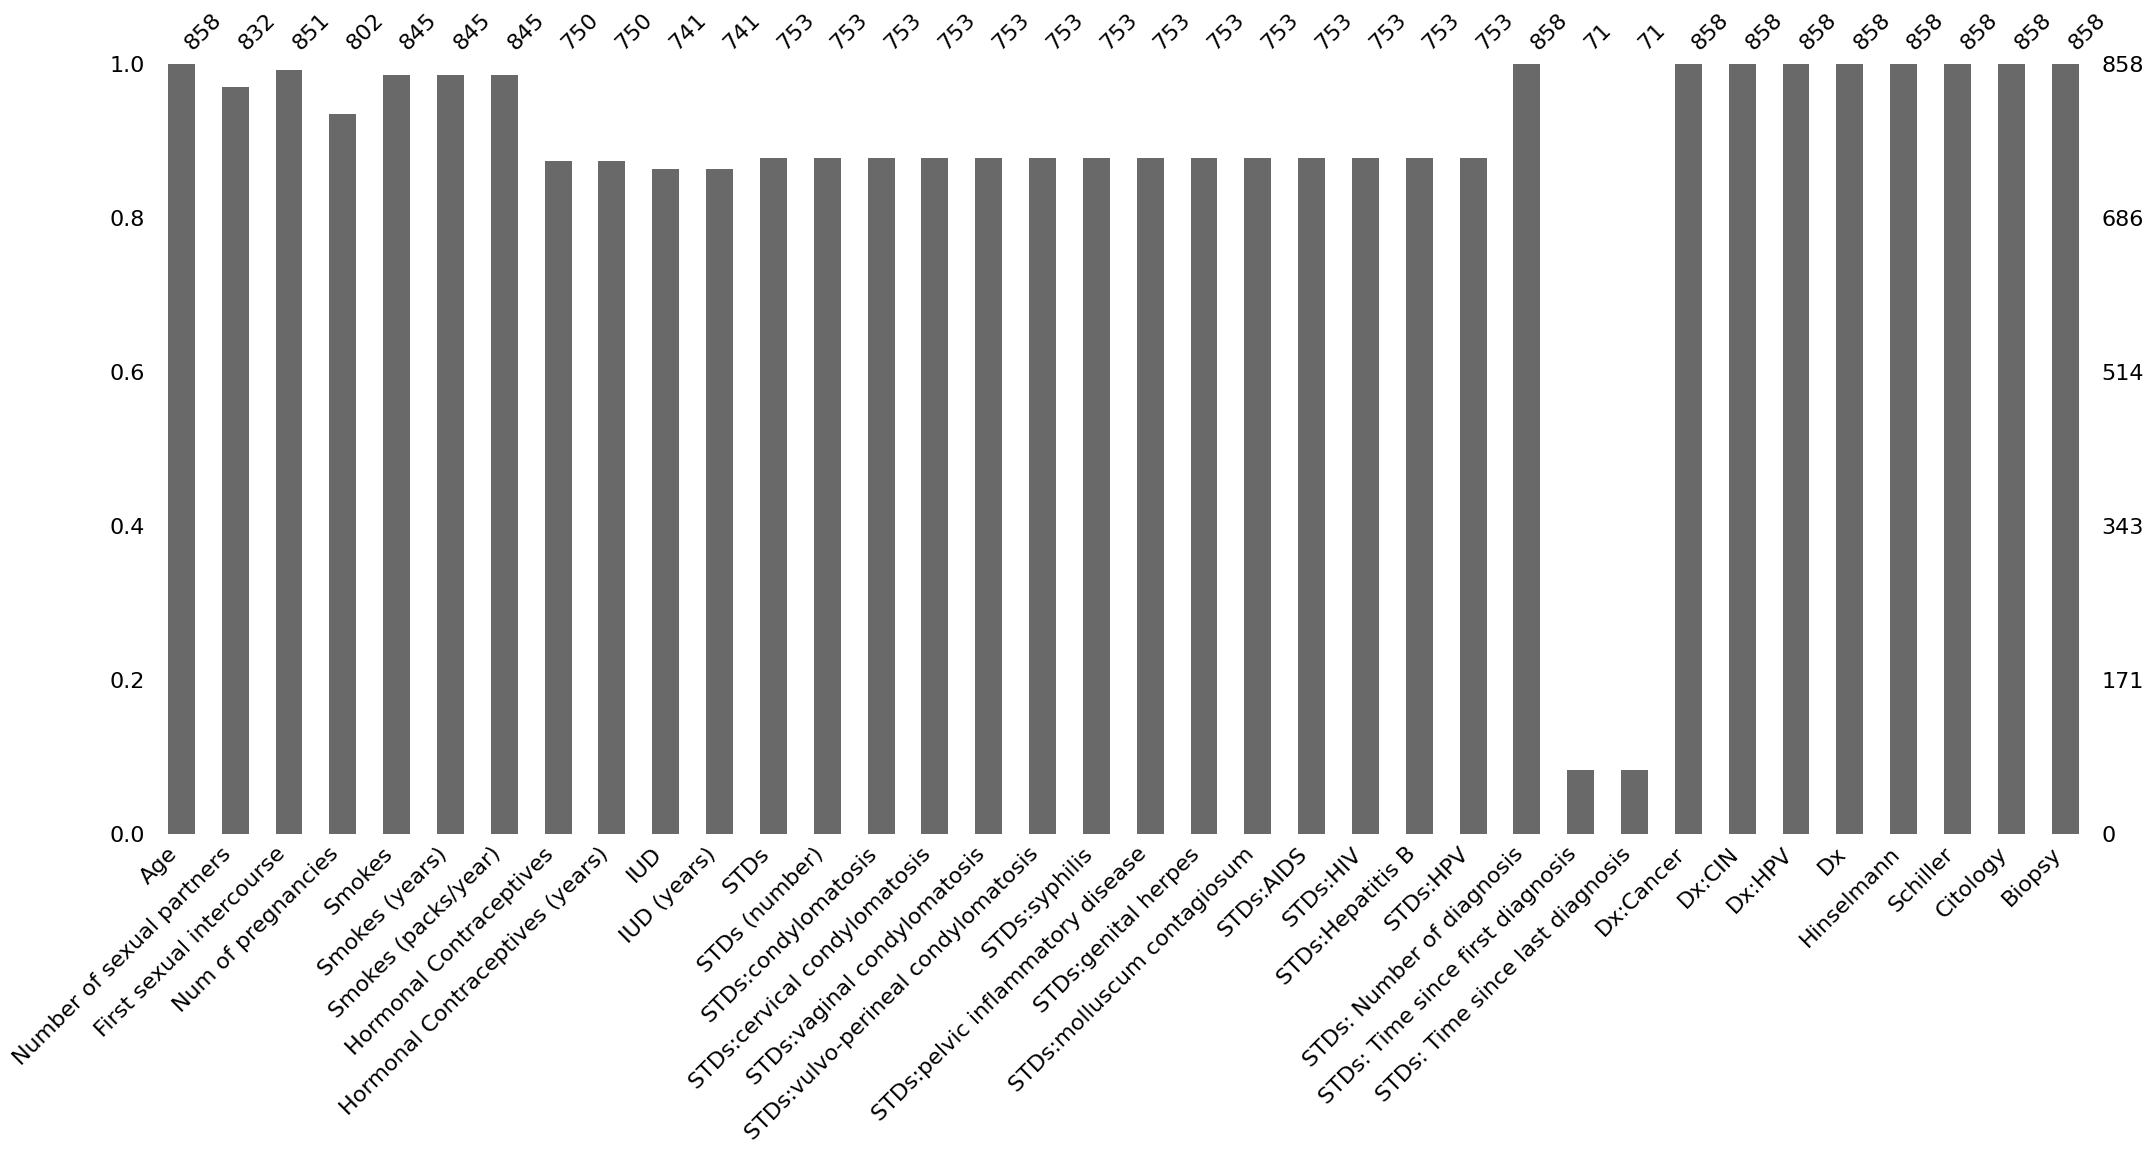

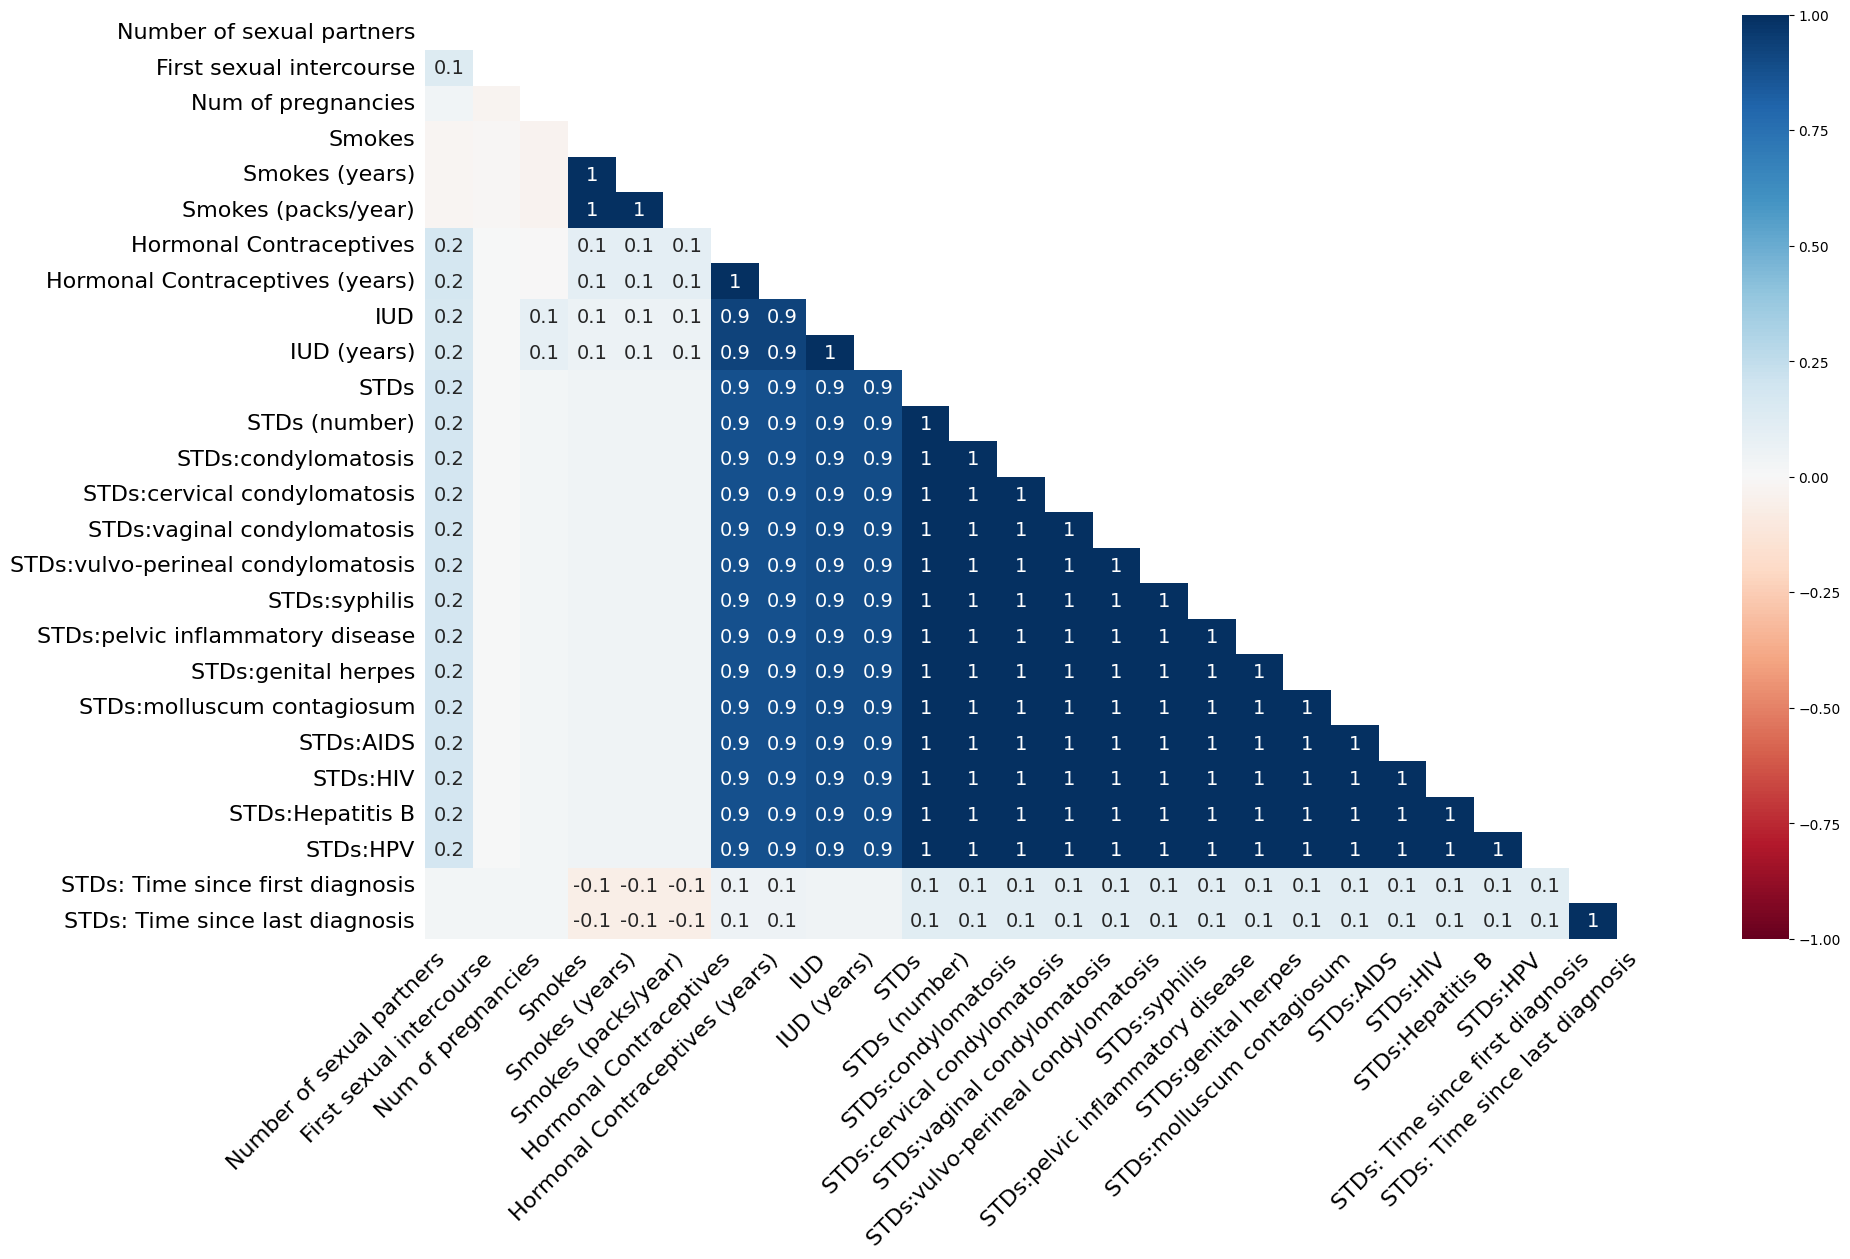

In [11]:
# Missing data matrix to visualize the pattern of missing values in the dataset
print(msno.bar(df)) #visualizing the number of missing values as a bar chart

print(msno.heatmap(df)) #heatmap showing the correlation of missingness between every 2 columns

As the heatmap above shows, test values' presence strongly correlates among one another, and that's mainly because when patients answered to the main STDs question, the questions for the more specific STDs experienced conseguent fillment (e.g., answering "No" at the beginning made them skip the entire STDs section). That's why there's a strong dependence in the right side of the heatmap. 
Ultimately, what can be understood from these graphs is that missing data, in this case, are not at random, but rather the gaps follow a logical structure. Patients indeed chose whether to answer, or not to a question. 

### IDENTIFY CORRELATIONS 
Perform visualization and understanding of correlations. 

In [ ]:
#Compute the correlation matrix
corr = df.select_dtypes(include=['number']).corr()

#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

#set up the matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Feature Correlation Heatmap")

In addition to the matrix, a list including the positively strongly correlated features (below 1.0) will now be shown, so as to make things clearer. 

In [ ]:
#generating unique correlated pairs by using the mask earlier defined 
#and unstacking the couples
unique_pairs = corr.where(mask).unstack().dropna()

#sort them and remove self-correlations (where corr = 1.0)
sorted_pairs = unique_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[sorted_pairs < 1.0]

#print the top 10 culprits
print("Top 10 Highest Correlations (Redundant Features):")
print(strong_pairs.head(10))


Top 10 Highest Correlations (Redundant Features):
STDs:vulvo-perineal condylomatosis  STDs:condylomatosis                 0.987875
STDs: Time since last diagnosis     STDs: Time since first diagnosis    0.930907
STDs (number)                       STDs                                0.918609
STDs: Number of diagnosis           STDs                                0.906662
STDs:condylomatosis                 STDs (number)                       0.899521
STDs: Number of diagnosis           STDs (number)                       0.897233
STDs:vulvo-perineal condylomatosis  STDs (number)                       0.890699
Dx:HPV                              Dx:Cancer                           0.886508
IUD (years)                         IUD                                 0.746478
Biopsy                              Schiller                            0.733204
dtype: float64


The same can be done with the most negatively correlated features: 

In [ ]:
print("Top 5 Negative Correlations:")
print(strong_pairs.tail(5))

What is it possible to extract from these results?
- Some features are enormously correlated, hence they're redundant. What will be done at a later stage will likely be removing one of the two features among the various couples of highly-correlated features. In particular, such couples are (with corr > 0.80)
    - STDs:condylomatosis - STDs:vulvo-perineal condylomatosis 
    - STDs - STDs (number)
    - STDs - STDs: Number of diagnosis
    - STDs:condylomatosis - STDs (number)
    - STDs (number) - Number of diagnosis 
    - STDs:vulvo-perineal condylomatosis - STDs (number)
    - Dx:HPV - Dx:Cancer

    Reasons behind these correlations mainly revolve around the medical domain, others depend on deterministic relationships (Binary vs. Count), and, when it comes to STDs: condylomatosis, the problem is that of the dominant class effect. 
- Negative correlation is very poor, as can be seen from the 5 most negatively correlated features. These couples' statistical irrelevance underlines one important thing about this dataset: since it is a risk factors dataset, risk factors are "additive" per se, meaning that there's no feature in this dataset such that its presence increases the cancer risk. 
- Interesting discovery: one correlation couple arises in particular among the 10 shown above, because it involves two features referred to two of the four diagnostic tests. In fact, Biopsy and Schiller tests are highly correlated, and that's because, in the medical diagnosys routine, these two tests are together part of a sequential diagnostic workflow that sees th Biopsy test being executed right after the Schiller one. This correlation among two of the four target variables is of vital importance: at a modeling stage, the model will likely be trained so decide how to handle biopsy based on how it handled Schiller. 

### FOCUS ON THE TARGET: THE FOUR DIAGNOSTIC TESTS
#### CLASS IMBALANCE VISUALIZATION
The goal of the project is to predict the four outcomes of the diagnostic tests. In this sense it is useful to first visualize how is the positive/negative ratio of the dataset for each test. 

In [ ]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
for target in targets: 
    plt.figure(figsize=(3,2))
    ax = sns.countplot(data=df, x=target)
    plt.title(f"{target} Test Positivity (0 = No, 1 = Yes)")

plt.show()

The four countplots shown above make it clear: there's a huge class imbalance towards negativity in the tests' results. This is a natural consequence when there's to deal with diagnostic medical datasets. 

#### MULTI-LABEL TARGET ANALYSIS
The reason why the goal of the project is to perform a multi-label classification task is that a patient can simultaneously be tested positive for multiple tests. Therefore, at this stage I want to understand how the four targets overlap (e.g., ask myself how likely a patient is tested positive for a test, when that patient has already been tested positive for another test).

In [ ]:
# Focus only on correlations with the targets
other_cols = [col for col in corr.columns if col not in targets]
plt.figure(figsize=(10, 8))
sns.heatmap(corr[targets].drop(other_cols),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Targets")
plt.show()

The heatmap says it clearly: Biopsy and Schiller are two notably correlated tests. In 73% of the cases, if one patient is tested positive at the Schiller's test, he/she will be tested positive at the biopsy test. Climbing down the correlation ladder, Schiller and Hinselmann are one more discretely correlated couple (0.65), and the same, even if with lower correlation values (0.55) can be said for the Biopsy-Hinselmann couple. 
Some sort of a pattern can be understood from this heatmap: 
- Schiller and Biopsy is the most strongly correlated couple; 
- Hinselmann moderately relates with the two aforementioned tests; 
- Citology is the only test that is "set apart": it is weakly correlated with all the three other tests. 

#### BIVARIATE ANALYSIS 

Investigating how individual features correlate with the four targets. 
The choice for the most relevant features at this stage has fallen on "Age", "Smokes (years)", and "Hormonal contraceptives (years)". 

##### RELATIONSHIP WITH "AGE"

In [ ]:
#Age relationship discovery with the four target variables
for target in targets: 
    Plot = sns.catplot(x=target, y="Age", kind="box", 
                    data=df, height=3, aspect=1.5)
    Plot.fig.suptitle(f'Correlation between {target} and Age', size=10, y=1.12)
    plt.show()

The two boxplots for each tests are really similar, thus meaning that "Age" is not really an attribute that clearly separates positives and negatives. Some degree of correlation is obviously existent (the boxplot for the positive case is wider than the other for the negative, even though it is not valid for Hinselmann test), but it is one other point we should insist on: the outliers. 
In fact, I can always track many outliers in the negative case, but that's not the case for the positive case. In other words, this means that general medical expectations are contradicted in this specific case: it may appear that cancer risk is not evidently increased by aging.

##### RELATIONSHIP WITH "SMOKES (YEARS)"

In [ ]:
#Smokes (years) relationship discovery with the four target variables

#since this feature is a sparse one (most people don't smoke),
#instead of just uning a boxplot, I will also overlay a stripplot to show the distribution of individual points
for i, taretg in enumerate(targets):
    sns.boxplot(x=target, y="Smokes (years)", data=df, 
                palette="pastel", showfliers=False) 
    
    #setting alpha=0.3 helps see density where points overlap
    sns.stripplot(x=target, y="Smokes (years)", data=df,
                  color='black', alpha=0.3, jitter=True)
    plt.suptitle(f'Correlation between {target} and Smokes (years)', size=10, y=1)
    plt.show()

In this case, things go completely the other way around. Even though the vast majority of the distribution is hugely skewed towards the 0 value because of the common non-smoking habit, it is still possible to infer something by looking at the outliers. In this case, it is possible to see that outliers are very well evident in both the two cases, but one interesting fact arises: the positive case contains enormously less instances than the negative class, but the notable presence of (weak) clusters in the 10 to 20+ years of smoking unveils the fact that prolonged smoking has an impact on test-positivity probability.

##### RELATIONSHIP WITH "HORMONAL CONTRACEPTIVES (YEARS)

In [ ]:
#Hormonal contraceptives (years) relationship discovery with the four target variables
#boxplots will likely be smashed towards 0 because, contrarily to smoking,
#many more people use hormonal contraceptives, but the duration of usage is still heavily skewed towards shoert-term use
#boxplots are sufficient in this case because outliers and the boxplots features are more visible
for target in targets: 
    Plot = sns.catplot(x=target, y="Hormonal Contraceptives (years)", kind="box", 
                    data=df, height=3, aspect=1.5)
    Plot.fig.suptitle(f'Correlation between {target} and Hormonal Contraceptives (years)', size=10, y=1.12)
    plt.show()

The same reasoning that has been done for the previous attribute can be repeated here: despite the somewhat similar boxplot structure, outliers are quite a few in the positive case, and their presence gets stronger in the 10+ years range. Again, the positive class, even though it has less instances, consists of important outlying clusters that suggest a relationship between the prolonged use of hormonal contraceptives and the probability of being tested positive at the four diagnostic tests.
 
One relevant fact about citology and its relationship with the other tests: taking these last plots as an example, I can see that one outlier being tested positive for citology disappears in the other three tests. This confirms the very weak correlation between this single test and the others, which mostly depends on the different nature of the citology test. 

#### OUTLIER INVESTIGATION
Studying the distribution of the continuous variables. 

In [ ]:
cols_to_check = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Hormonal Contraceptives (years)'] 

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_to_check):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection: {col}', size=15)
    plt.xlabel(col, size=12)
plt.tight_layout()
plt.show()

In [ ]:
#using histograms to show the distribution of those features that are not suitable for outlier detection via boxplots 
#(because of the high number of zero values and the skewness of the distribution)
cols_to_check_hist = ['Smokes (years)', 'Smokes (packs/year)','IUD (years)', 'STDs (number)',
                       'STDs: Number of diagnosis','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_to_check_hist):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[col],color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### CHECKING FOR NEAR-ZERO VARIANCE 
Verify whether there's any attribute that is characterized by near-zero variance. One such attribute, if spotted, might be safely removed, as it does not help at all at a modeling stage. 

In [ ]:
#setting the variance threshold
#columns with var < var_threshold will be flagged as low variance features, which may not contribute much to the predictive power of the model and could be considered for removal
var_threshold = 0.01

#not considering the target variables from scaling and analysis
features = [col for col in df.columns if col not in targets]

#scaling the features to a common range so to not falsify variance calculations due to different scales of the features
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(df[features])
scaled_df = df.copy()
scaled_df[features] = scaled_data

#also excluding the already discovered two features with too many NaN values
nan_cols = ["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"]
for col in scaled_df.columns:
    if col not in nan_cols: 
        if scaled_df[col].var() < var_threshold:
            if  col == "Number of sexual partners" or col == "Smokes (packs/year)"  :
                print(f"Feature '{col}' has low variance ({scaled_df[col].var():.4f}) and may be a candidate for removal, but it is kept because of its potential importance in predicting cervical cancer risk.")
            else: 
                print(f"Feature '{col}' has low variance ({scaled_df[col].var():.4f}) and may be a candidate for removal.")

In [ ]:
#setting the variance threshold
#columns with var < var_threshold will be flagged as low variance features, which may not contribute much to the predictive power of the model and could be considered for removal
var_threshold = 0.01

#not considering the target variables from scaling and analysis
features = [col for col in df.columns if col not in targets]

#scaling the features to a common range so to not falsify variance calculations due to different scales of the features
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(df[features])
scaled_df = df.copy()
scaled_df[features] = scaled_data

#also excluding the already discovered two features with too many NaN values
for col in scaled_df.columns:
    if scaled_df[col].var() < var_threshold:
        if  col == "Number of sexual partners" or col == "Smokes (packs/year)"  :
            print(f"Feature '{col}' has low variance ({scaled_df[col].var():.4f}) and may be a candidate for removal, but it is kept because of its potential importance in predicting cervical cancer risk.")
        else: 
            print(f"Feature '{col}' has low variance ({scaled_df[col].var():.4f}) and may be a candidate for removal.")

- Note that the first two features with low variances are those that, according to the previous boxplot, are characterized by having the vast majority of their distribution skewed to the bottom of the distribution itself (it is more frequent to find non-smokers, and the number of sexual partners is a standard one). These two features are greatly important for further inferring processes, so they won't be eliminated. The extremely low variance for these two features is inherently like that;
- Features with var == 0 will likely be dropped as they provide zero information to the future models; 
- As for the remainder features, despite their very low variance (caused by the fact that the dataset is obviously imbalanced), they have notable clinical significance and they can't just be dropped basing on this measurement. However, these latest results might suggest to aggregate these features under the same umbrella (e.g., "rare_stds").

### FURTHER OUTLIER ANALYSIS
Investigating over all the attributes, plotting boxplots in order to see the level of sparsity affecting the distribution of values in each feature. This dataset in inherently skewed in most parts, therefore, after having checked distribution, it is my intention to apply transformation means to reduce skewness. 


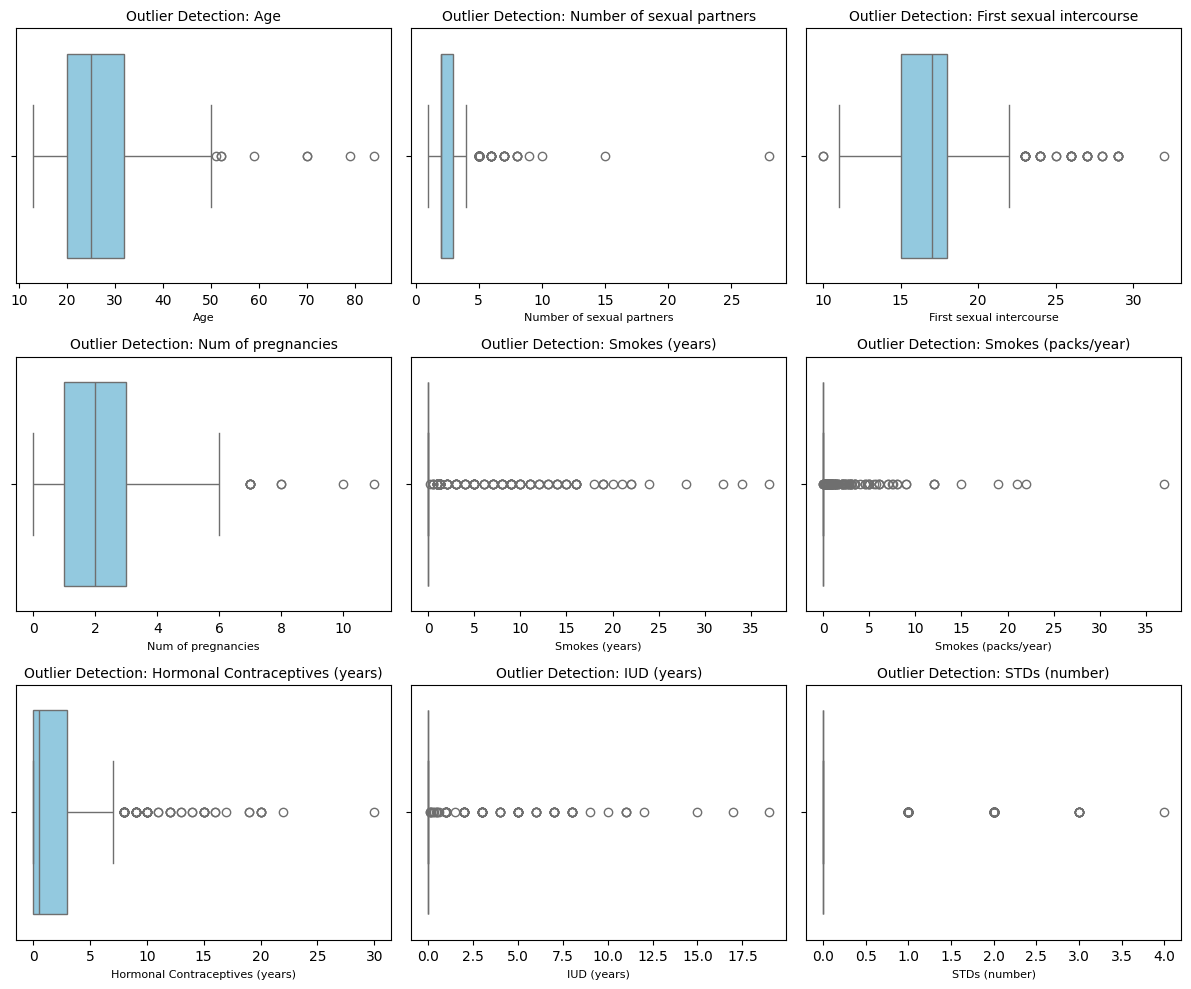

In [28]:
#replacing "?" values with NaN to plot the graphs
df_temp = df.replace('?', np.nan)

#columns to check for outliers, which are all the continuous features in the dataset
#the other columns are binary features, thus not suitable for outlier detection via boxplots
continuous_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 
    'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)'
]

#converting continuous columns to numeric, coercing errors to NaN (which will be ignored in the boxplots)
for col in continuous_cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

#plotting the boxplots    
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_temp[col], color='skyblue')
    plt.title(f'Outlier Detection: {col}', size=10)
    plt.xlabel(col, size=8)

plt.tight_layout()
plt.show()

What can be inferred from these boxplots?
- Number of sexual partners, Smokes (years), Smokes (packs/years), Hormonal Contraceptives (years), and IUD (years) are greatly skewed to the left-hand side of the distribution. Logarithmic transformation will likely be applied in preprocessing so to reduce skewness and normalize their distributions. 
- STDs (number), and Num of pregnancies are skewed distributions too, but their range of values is too narrow to be suitable for log transformation. These features will be kept as-is.
- Age, First sexual intercourse are normally distributed features, hence they will be only scaled at a later stage. 

### WHAT HAS EDA UNVEILED SO FAR? WHAT'S TO DO?
- Missing values handling: 
    - Two columns in particular have too many of them, but at the same time they're extremely important from the medical point of view. For this reason, instead of merely dropping them, I will transform the two columns into a single binary-data type column that flags an instance with '1' if the patient has a diagnosis history, '0' otherwise;
    - As for the other columns with missing values, they will be dealt with in two parallel imputation scenarios: K-NN imputation and median imputation. For this purpose, two different modeling scenarios will be generated, and one side quest of the project will also be which of the two imputation methods ultimately yields to optimal results at the modeling phase.
- Some duplicate entries do exist: these will be dropped during data cleaning;
- Highly correlated features: some features' correlation values are extremely high. This means that it might be possible to drop one from each of these couples;
- Low-variance features will either be aggregated, or dropped if their variance value is 0. 